# Real-world Data Wrangling

In [397]:
# !python -m pip install kaggle==1.6.12

In [398]:
## !pip install --target=/workspace ucimlrepo numpy==1.24.3

**Note:** Restart the kernel to use updated package(s).

In [400]:
import pandas as pd
import numpy as np
import requests

## 1. Gather data

### **1.1.** Problem Statement
In this project, we will investigate the educational attainment levels among individuals employed in computer-related occupations in King County, Washington, by gathering, cleaning, and analyzing relevant data to identify trends, distributions, and potential correlations within the local workforce

### **1.2.** Gather at least two datasets using two different data gathering methods

#### **Dataset 1**

Type: XLS file

Method: The data was gathered using the "Downloading files" method from U.S Bureau of Labor Statistics (Occupational Employment and Wage Statistics tables)

Dataset variables:

*   *AREA:* Area code
*   *AREA_TITLE:* Title of the metropolitan area
*   *OCC_CODE:* Occupational Code
*   *OCC_TITLE:* Occupational Title
*   *A_MEAN:* Mean Annual Wage

In [405]:
## Load OEW Dataset to access king county/seattle-tacoma area dataset
oew_data = pd.read_excel('MSA_M2023_dl.xlsx')

## TODO
## rename MSA_M2023_dl.xlsx to 'oew_research_2023.xlsx'

In [407]:
## Check the datasets' first 5 rows
oew_data.head(5)

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,18.6,28.03,40.08,22750,28710,38680,58310,83360,NaN,NaN
1,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,39.09,58.27,81.79,42080,59290,81310,121200,170130,NaN,NaN
2,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,...,97.28,#,#,98490,135280,202340,#,#,NaN,NaN
3,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,...,37.19,57.85,86.97,34440,49430,77360,120330,180900,NaN,NaN
4,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-2021,Marketing Managers,...,45.31,72.66,97.35,60130,74980,94240,151130,202490,NaN,NaN


#### Dataset 2

Type: API

Method: The data was gathered using the "API" method from the United States Census Bureau Public Use Microdata Sample site

Dataset variables:

*   *SOCP:* Standard Occupational Classification (SOC) codes for 2018 and later based oin 2018 SOC codes
*   *SCHL:* Educational Attainment
*   *SCHL_RC1:* Educational Attainment recode 

In [409]:
## Access PUMS API for census information for king county/seattle-tacoma dataset
url = 'https://api.census.gov/data/2023/acs/acs1/pums?get=PWGTP,SOCP,SCHL_RC1,SCHL&ucgid=795P200US5323304&recode+SCHL_RC1=%7B%22b%22:%22SCHL%22,%22d%22:%5B%5B%220%22,%2201%22,%2202%22,%2203%22,%2204%22,%2205%22,%2206%22,%2207%22,%2208%22,%2209%22,%2210%22,%2211%22,%2212%22,%2213%22,%2214%22,%2215%22%5D,%5B%2216%22,%2217%22%5D,%5B%2218%22,%2219%22%5D,%5B%2220%22,%2221%22%5D,%5B%2222%22,%2223%22,%2224%22%5D%5D%7D'
pums_response = requests.get(url)
pums_response.raise_for_status()

## Get the json
pums_response_data = pums_response.json()

## Create dataframe from json
pums_data = pd.DataFrame(pums_response_data)

In [410]:
## Check the data returns
print(pums_data.head(5))

       0       1         2     3      4      5
0  PWGTP    SOCP  SCHL_RC1  SCHL   PUMA  STATE
1     47       N         3    19  23304     53
2     74  537062         3    19  23304     53
3     54       N         4    21  23304     53
4     18       N         4    21  23304     53


## Assess Dataset 1 - OEW ##

#### Framework for completion ###
- 1. Issue Assessment
- -- State issue
- -- Identify issue: identification technique (visually or programmatically)
- -- Issue type (Data quality or Tidiness)
- -- Provide justification for issue
- 2. Clean Issue
- -- Cleaning strategy: 
- -- cleaning verification

In [413]:
## Make copy of dataset before assessment and cleaning
oew_data_copy = oew_data.copy()

In [414]:
## visual assessments
oew_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149591 entries, 0 to 149590
Data columns (total 32 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AREA          149591 non-null  int64  
 1   AREA_TITLE    149591 non-null  object 
 2   AREA_TYPE     149591 non-null  int64  
 3   PRIM_STATE    149591 non-null  object 
 4   NAICS         149591 non-null  int64  
 5   NAICS_TITLE   149591 non-null  object 
 6   I_GROUP       149591 non-null  object 
 7   OWN_CODE      149591 non-null  int64  
 8   OCC_CODE      149591 non-null  object 
 9   OCC_TITLE     149591 non-null  object 
 10  O_GROUP       149591 non-null  object 
 11  TOT_EMP       149591 non-null  object 
 12  EMP_PRSE      149591 non-null  object 
 13  JOBS_1000     149591 non-null  object 
 14  LOC_QUOTIENT  149591 non-null  object 
 15  PCT_TOTAL     0 non-null       float64
 16  PCT_RPT       0 non-null       float64
 17  H_MEAN        149591 non-null  object 
 18  A_ME

#### AD1 - Issues List -  ####
**Issue #1** column not needed for analysis
Issue Assessment
-- State issue: Dataset has columns not need for analysis, reduce footprint to only needed columns
-- identification technique: visually
-- Issue type: Tidiness
-- Provide justification for issue

#### AD1 - Issues  -  ####
**Issue #1** column not needed for analysis
Clean Issue
-- Cleaning strategy: select only needed columns
-- cleaning verification: .info() to verify columns

In [417]:
# Create subset of dataset needed for analysis
oew_cleaned = oew_data_copy[['AREA', 'OCC_CODE', 'OCC_TITLE', 'A_MEAN']].reindex()

In [418]:
# Inspecting the dataframe visually
oew_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149591 entries, 0 to 149590
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   AREA       149591 non-null  int64 
 1   OCC_CODE   149591 non-null  object
 2   OCC_TITLE  149591 non-null  object
 3   A_MEAN     149591 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.6+ MB


#### AD1 - Issues List -  ####
issue: A_MEAN is object instead of float
justification: calculations/graphs with columns require conversion

In [420]:
## check sample data in columns (visual assessment)
oew_cleaned.sample(20)

,AREA,OCC_CODE,OCC_TITLE,A_MEAN
107143,40420,21-0000,Community and Social Service Occupations,54260
66204,28940,29-1011,Chiropractors,60240
142126,71650,29-1123,Physical Therapists,100700
99704,38900,23-2011,Paralegals and Legal Assistants,73220
36974,20020,43-2011,"Switchboard Operators, Including Answering Ser...",28740
119458,42660,49-2011,"Computer, Automated Teller, and Office Machine...",50290
149315,79600,29-1213,Dermatologists,333800
136695,48260,37-1011,First-Line Supervisors of Housekeeping and Jan...,39320
5817,11540,51-9011,Chemical Equipment Operators and Tenders,51610
127375,45500,29-2034,Radiologic Technologists and Technicians,65200


#### AD1 - Issues List -  ####
- issue: A_MEAN has value '*'
- 

In [422]:
## issue identification: Programmatic
## issue type: validity/quality
## issue: In addition to '*' there was a "#" value in the columns. This are invalid since this column represents a float value
oew_cleaned['A_MEAN'].value_counts()

A_MEAN
*         1487
#          144
54330       50
46110       48
40820       47
          ... 
207260       1
238120       1
193040       1
161570       1
295110       1
Name: count, Length: 15760, dtype: int64

In [423]:
## Cleaning strategy: Replace '*' & '#' with np.nan and convert column to float
## justification: allows for pandas function to handle missing values consistently
pd.set_option('future.no_silent_downcasting', True)

oew_cleaned['A_MEAN'] = oew_cleaned['A_MEAN'].replace(['*','#'], [np.nan, np.nan])
oew_cleaned['A_MEAN'].astype(float)

0          49780.0
1         100690.0
2         240020.0
3          98480.0
4         116290.0
            ...   
149586     44550.0
149587     45740.0
149588     35630.0
149589     38900.0
149590     52670.0
Name: A_MEAN, Length: 149591, dtype: float64

In [424]:
## cleaning verification
oew_cleaned.isnull().sum().sum()

1631

In [425]:
## Issue: We are only interested in analyzing Seattle-Tacoma-Washington data only
## Issue type: Tidyness
## Indentification: programmatic
## count for seattle code is 715 vs ~150k entries in dataset
seattle_area = 42660
oew_cleaned[oew_cleaned['AREA'] == seattle_area].value_counts()

AREA   OCC_CODE  OCC_TITLE                                                      A_MEAN
42660  00-0000   All Occupations                                                86520     1
       43-9051   Mail Clerks and Mail Machine Operators, Except Postal Service  45490     1
       43-4199   Information and Record Clerks, All Other                       53630     1
       43-5011   Cargo and Freight Agents                                       56020     1
       43-5021   Couriers and Messengers                                        46830     1
                                                                                         ..
       25-4022   Librarians and Media Collections Specialists                   99360     1
       25-4031   Library Technicians                                            62270     1
       25-9031   Instructional Coordinators                                     89850     1
       25-9044   Teaching Assistants, Postsecondary                             51030

In [426]:
## Cleaning strategy: Filter out rows not relevant to analysis
## justification: reducing dataset size
seattle_area = 42660
oew_cleaned = oew_cleaned[oew_cleaned['AREA'] == seattle_area]

In [427]:
## Cleaning verification
oew_cleaned['AREA'].nunique()
## I can probably drop this column now. it is repeated for all columns and add no value to the analysis

1

In [428]:
oew_cleaned.sample(30)

,AREA,OCC_CODE,OCC_TITLE,A_MEAN
119015,42660,17-3028,Calibration Technologists and Technicians,85750
119386,42660,43-5051,Postal Service Clerks,60750
119454,42660,47-5022,Excavating and Loading Machine and Dragline Op...,78190
119102,42660,25-1082,"Library Science Teachers, Postsecondary",116280
119310,42660,39-2011,Animal Trainers,58420
119011,42660,17-3024,Electro-Mechanical and Mechatronics Technologi...,92470
119519,42660,51-4021,"Extruding and Drawing Machine Setters, Operato...",50910
119169,42660,27-4011,Audio and Video Technicians,82270
119266,42660,33-2011,Firefighters,92560
119073,42660,21-2011,Clergy,73740


In [429]:
## Issue: We are only interested in analyzing computer-related occupations data only
## Issue type: Tidyness
## Indentification: visual 
## (OCC_TITLE column has non-computer related descriptions)
## ============================================================

## cleaning strategy: Filter out all other OCC_CODEs 
comsci_startwith = '15-'
oew_cleaned = oew_cleaned[ oew_cleaned['OCC_CODE'].str.startswith(comsci_startwith)]

In [430]:
## Cleaning verification
oew_cleaned.head()

,AREA,OCC_CODE,OCC_TITLE,A_MEAN
118962,42660,15-0000,Computer and Mathematical Occupations,144530
118963,42660,15-1211,Computer Systems Analysts,138410
118964,42660,15-1212,Information Security Analysts,154600
118965,42660,15-1221,Computer and Information Research Scientists,211410
118966,42660,15-1231,Computer Network Support Specialists,100650


In [431]:
oew_cleaned.duplicated()

118962    False
118963    False
118964    False
118965    False
118966    False
118967    False
118968    False
118969    False
118970    False
118971    False
118972    False
118973    False
118974    False
118975    False
118976    False
118977    False
118978    False
118979    False
118980    False
118981    False
118982    False
118983    False
dtype: bool

In [432]:
### ISSUE OCC_CODE (xx-xxxx) and SOCP (xxxxxx) code are in different formats
### issue type: consistency
## identification type: visual
oew_cleaned['OCC_CODE'] = oew_cleaned['OCC_CODE'].replace('-', '', regex=True)

oew_cleaned.head()

,AREA,OCC_CODE,OCC_TITLE,A_MEAN
118962,42660,150000,Computer and Mathematical Occupations,144530
118963,42660,151211,Computer Systems Analysts,138410
118964,42660,151212,Information Security Analysts,154600
118965,42660,151221,Computer and Information Research Scientists,211410
118966,42660,151231,Computer Network Support Specialists,100650


## Assess Dataset 2 ## -- PUMS

#### Framework for completion ###
- 1. Issue Assessment
- -- State issue
- -- Identify issue: identification technique (visually or programmatically)
- -- Issue type (Data quality or Tidiness)
- -- Provide justification for issue
- 2. Clean Issue
- -- Cleaning strategy: 
- -- cleaning verification

In [435]:
## Make copy of dataset before assessment and cleaning
pums_data_copy = pums_data.copy()

In [436]:
### header is the first row of data 
print(pums_data_copy.head(5))

       0       1         2     3      4      5
0  PWGTP    SOCP  SCHL_RC1  SCHL   PUMA  STATE
1     47       N         3    19  23304     53
2     74  537062         3    19  23304     53
3     54       N         4    21  23304     53
4     18       N         4    21  23304     53


In [437]:
## Issue columns headers are rows in the dataset
## Identification: visual
## issue type: Quality (?)
## justification: fix for easy assess to column data

# Cleaning strategy - Fix issue with column headers
columns = pums_response_data[0]
rows = pums_response_data[1:]
pums_cleaned = pd.DataFrame(rows, columns=columns)

In [438]:
# Cleaning verification
pums_cleaned.columns

Index(['PWGTP', 'SOCP', 'SCHL_RC1', 'SCHL', 'PUMA', 'STATE'], dtype='object')

In [439]:
## Issue invalid data in SOCP columns
## identification: programmatics/visual?
## issue type: Quality - Invalid value of 'N' in this context
pums_cleaned['SOCP'].describe()

count     1774
unique     218
top          N
freq       691
Name: SOCP, dtype: object

In [440]:
#cleaning strategy - remove the rows with SOCP value on 'N' they are not relevant in this context
pums_cleaned = pums_cleaned[pums_cleaned['SOCP'] != 'N']

In [441]:
#cleaning verification
print((pums_cleaned['SOCP'] == 'N').sum())
pums_cleaned['SOCP'].isnull().sum()


0


0

In [473]:
## issue - Focus on computer related roles only so drop everything else
pums_cleaned = pums_cleaned[pums_cleaned['SOCP'].str.contains(r'^15\d{4}$', case=False, regex=True)]
pums_cleaned.head()


,PWGTP,SOCP,SCHL_RC1,SCHL,PUMA,STATE
34,36,151252,4,21,23304,53
45,59,151252,4,21,23304,53
50,74,151252,5,22,23304,53
81,81,151252,5,22,23304,53
82,84,151252,5,22,23304,53


In [475]:
# Issue tidying up the dataset to leave only columns needed for analysis
# Issue type: Tidiness
# Identification type: Visual 
# Create subset of dataset needed for analysis
pums_cleaned = pums_cleaned[['SOCP','SCHL_RC1', 'SCHL']].reindex()

In [477]:
pums_cleaned.duplicated().value_counts()

True     190
False     29
Name: count, dtype: int64

### TODO ###
### - Turn SCHL_RC1 into actual
#### SCHL_RC1 == 0 => [No high school diploma] => SCHL == [0-15]
#### SCHL_RC1 == 1 => [high school diploma] => SCHL == [16-17]
#### SCHL_RC1 == 2 => [Completed Some College] => SCHL == [18-19]
#### SCHL_RC1 == 3 => [Graduated College] => SCHL == [20-21]
#### SCHL_RC1 == 4 => [Completed Advance Degree] => SCHL == [22-24]
#### Data Quality issue - completeness address by above?

### Dimensions of data quality ###

**Completeness** is a metric that helps you understand whether your data is sufficient to answer interesting questions or solve your problem.
**Validity** is a metric helping you understand how well your data conforms to a defined set of rules for data, also known as a schema.
**Accuracy** is a metric that helps you understand whether your data accurately represents the reality it aims to depict.
**Consistency** is a metric that helps you understand two things: whether your data follows a standard format and whether your data’s info matches with information from other data sources.
**Uniqueness** is a metric that helps you understand whether there are duplicate or overlapping values in your data.

## validity - check that salary is within range and there are no outliers ## std +-1 ) (programmatic) ##
## DATA QUALITY check for uniqueness (programmatic assessment) ##

### requirements for tidiness: ###
Each **variable** forms a column
Each **observation** forms a row
Each type of **observational unit** forms a table

In [480]:
## Completeness issue with SCHL_RC1 
## Create lookup list for education level (ED_LEVEL)
## Add column to PUMS dataset
## Fill ED_LEVEL by matching with SCHL_RC1

ed_level_data = {
    'SCHL_RC1': ['1', '2', '3', '4', '5'],
    'ED_LEVEL': [
        'No high school diploma',    # SCHL_RC1 == 0, SCHL range [0-15]
        'High school diploma',       # SCHL_RC1 == 1, SCHL range [16-17]
        'Completed Some College',    # SCHL_RC1 == 2, SCHL range [18-19]
        'Graduated College',         # SCHL_RC1 == 3, SCHL range [20-21]
        'Completed Advance Degree'   # SCHL_RC1 == 4, SCHL range [22-24]
    ]
}

ed_level_df = pd.DataFrame(ed_level_data)

# merge with pums dataset
pums_merged = pums_cleaned.merge(ed_level_df, on='SCHL_RC1', how='left')
pums_merged.head()

,SOCP,SCHL_RC1,SCHL,ED_LEVEL
0,151252,4,21,Graduated College
1,151252,4,21,Graduated College
2,151252,5,22,Completed Advance Degree
3,151252,5,22,Completed Advance Degree
4,151252,5,22,Completed Advance Degree


In [482]:
# merge oew with pums
merged_df = pums_merged.merge(oew_cleaned, left_on='SOCP', right_on='OCC_CODE', how='left')
merged_df.sample(30)

,SOCP,SCHL_RC1,SCHL,ED_LEVEL,AREA,OCC_CODE,OCC_TITLE,A_MEAN
160,151252,5,22,Completed Advance Degree,42660.0,151252,Software Developers,164130
119,151252,5,22,Completed Advance Degree,42660.0,151252,Software Developers,164130
31,151252,5,22,Completed Advance Degree,42660.0,151252,Software Developers,164130
29,151252,5,22,Completed Advance Degree,42660.0,151252,Software Developers,164130
159,151221,5,24,Completed Advance Degree,42660.0,151221,Computer and Information Research Scientists,211410
66,151252,4,21,Graduated College,42660.0,151252,Software Developers,164130
136,151252,4,21,Graduated College,42660.0,151252,Software Developers,164130
12,151252,5,23,Completed Advance Degree,42660.0,151252,Software Developers,164130
157,151252,5,22,Completed Advance Degree,42660.0,151252,Software Developers,164130
207,151299,4,21,Graduated College,42660.0,151299,"Computer Occupations, All Other",137130


<Axes: ylabel='ED_LEVEL'>

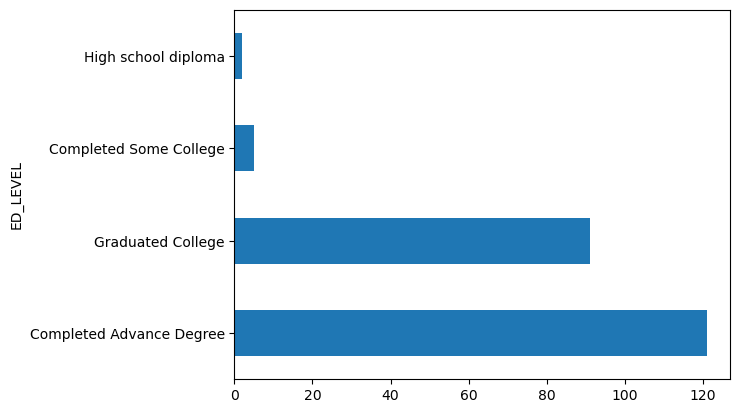

In [504]:
merged_df['ED_LEVEL'].value_counts().plot(kind='barh')

<Axes: xlabel='A_MEAN', ylabel='ED_LEVEL'>

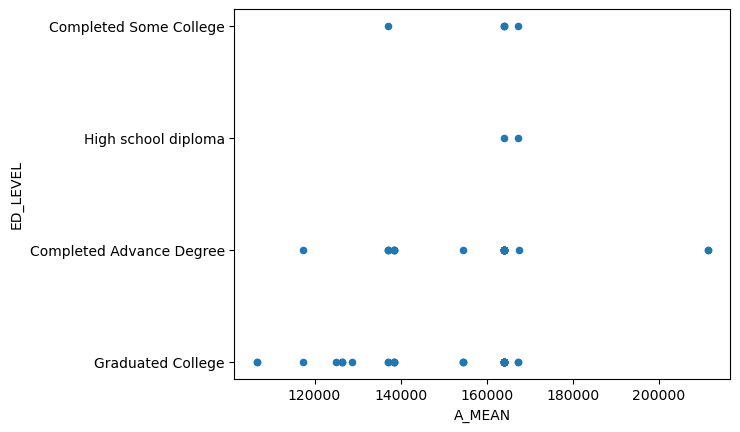

In [514]:
merged_df.plot(kind='scatter', y='ED_LEVEL', x='A_MEAN')

In [498]:
# Calculate and print the Pearson correlation coefficient
def calculate_correlation(df, x_column, y_column):
    pearson_cc = df[x_column].corr(df[y_column])
    print(f'Pearson Correlation Coefficient is {pearson_cc:.3f}')

In [520]:
calculate_correlation(merged_df, 'A_MEAN', 'SCHL_RC1')

Pearson Correlation Coefficient is 0.152


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

Issue and justification: *column header* is the first row of dataset

### Quality Issue 2:

Issue and justification:
*SOCP has a value N which is invalid entry in this context and should be removed from the dataset*

### Tidiness Issue 1:

Issue and justification: *For my analysis, A_MEAN should be a float/int64 and not an object. It also has values '\*' and '#' which are invalid*


### Tidiness Issue 2: 

Issue and justification: *FILL IN*

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

### **Quality Issue 1: FILL IN**

Justification: *Fixing the column headers improves that handling when trying to combine the data from the two datasets to use column names instead of numbers*

### **Quality Issue 2: FILL IN**

Justification: *SOCP has a row with value 'N' which is invalid entry in this context and after the analysis if not removed*

### **Tidiness Issue 1: FILL IN**

Justification: *Replacing this values with np.nan exlcudes them from calculations of mean and sum by default*

### **Tidiness Issue 2: FILL IN**

In [ ]:
#FILL IN - Apply the cleaning strategy

In [ ]:
#FILL IN - Validate the cleaning was successful

Justification: *FILL IN*

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [ ]:
#FILL IN - Remove unnecessary variables and combine datasets

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [154]:
#FILL IN - saving data
# merged_df.to_csv('pums_oews_2023_compsci_edlevel.csv', index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* FILL IN from answer to Step 1

In [ ]:
#Visual 1 - FILL IN

*Answer to research question:* FILL IN

In [ ]:
#Visual 2 - FILL IN

*Answer to research question:* FILL IN

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* FILL IN